<a href="https://colab.research.google.com/github/Muzsek/Aj/blob/main/AIO_01_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating CAPTCHA Images for training

In [1]:
# Installing CATPCHA to generate images
!pip install captcha

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 9.8 MB/s eta 0:00:00


In [2]:
# Importing all the neccesary libraries
from captcha.image import ImageCaptcha
import random
import string
import os
from pathlib import Path
from google.colab import drive
from pathlib import Path
from PIL import Image

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

main_folder = Path('/content/drive/MyDrive/Colab/Captcha/images')
main_folder.mkdir(parents = True, exist_ok = True)

training_folder= Path('/content/drive/MyDrive/Colab/Captcha/images/train')
training_folder.mkdir(parents = True, exist_ok = True)

testing_folder = Path('/content/drive/MyDrive/Colab/Captcha/images/test')
testing_folder.mkdir(parents = True, exist_ok = True)

In [4]:
random.seed(42)
chars = string.ascii_lowercase + string.ascii_uppercase + string.digits


In [5]:
"""
img = ImageCaptcha(width = 120,
                    height = 50)
for i in range(int(3000*0.8)):
  label = ''.join(random.choices(chars, k = 2))
  image = img.generate_image(label)
  image.save(training_folder / f"{label}_{i}.png")

for i in range(int(3000*0.2)):
  label = ''.join(random.choices(chars, k = 2))
  image = img.generate_image(label)
  image.save(testing_folder / f"{label}_{i}.png")
print(f"{len(os.listdir(os.path.join(training_folder)))} training images created")
print(f"{len(os.listdir(os.path.join(testing_folder)))} testing images created")
"""
print("Jumped")

Jumped


In [6]:
print(f"There are {len(os.listdir(os.path.join(training_folder)))} training images")
print(f"There are {len(os.listdir(os.path.join(testing_folder)))} testing images")

There are 2400 training images
There are 600 testing images


In [7]:
# Deletion code if needed
#!rm -rf data/captcha/test/*
#!rm -rf data/captcha/train/*

In [8]:
#!ls /content/drive/MyDrive/Colab/Captcha/images/train

Image height: 50 | Image width: 120
The image below should say 'aP' 
Expected label:  aP


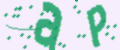

In [9]:
random.seed(42)
train_images_path = Path('/content/drive/MyDrive/Colab/Captcha/images/train/')

image_path_list = list(train_images_path.glob("*_*.png"))

random_image_path = random.choice(image_path_list)

img = Image.open(random_image_path)

print(f"Image height: {img.height} | Image width: {img.width}")
print("The image below should say 'aP' ")
print(f"Expected label: ",random_image_path.stem.split("_")[0])
img


In [12]:
char_to_idx = {c: i for i,c in enumerate(chars)}
idx_to_char = {i: c for c,i in char_to_idx.items()}

def encode_label(lable_str):
  return [char_to_idx[c] for c in lable_str]

def decode_indices(indices):
  return ''.join(idx_to_char[i] for i in indices)

#encode_label('aP')
#decode_indices(encode_label('aP'))

In [14]:
from torchvision import transforms


data_transform = transforms.Compose(
    [
        transforms.Grayscale(),
        transforms.Resize((50,120)),
        transforms.ToTensor(),
    ]
)

In [28]:
from torch.utils.data import Dataset
from PIL import Image
import torch

class CaptchaDataset(Dataset):
  def __init__(self, image_paths, transform = None):
    self.image_paths = image_paths
    self.transform = transform

  def __len__(self):
    return len(self.image_paths)

  def __getitem__(self, idx):
    img_path = self.image_paths[idx]
    image = Image.open(img_path)
    if self.transform:
      image = self.transform(image)

    label_str = img_path.stem.split("_")[0]
    label = torch.tensor(encode_label(label_str), dtype=torch.long)
    return image,label

In [29]:
from pathlib import Path
from torch.utils.data import DataLoader

# Elérési utak
train_paths = list(Path('/content/drive/MyDrive/Colab/Captcha/images/train').glob("*_*.png"))
test_paths  = list(Path('/content/drive/MyDrive/Colab/Captcha/images/test').glob("*_*.png"))

# Dataset példányok
train_dataset = CaptchaDataset(train_paths, transform=data_transform)
test_dataset  = CaptchaDataset(test_paths, transform=data_transform)

# DataLoaderek
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

In [35]:
train_dataset[0]

(tensor([[[0.9608, 0.9608, 0.9608,  ..., 0.9608, 0.9608, 0.9608],
          [0.9608, 0.9608, 0.9608,  ..., 0.9608, 0.9608, 0.9608],
          [0.9608, 0.9608, 0.9608,  ..., 0.9608, 0.9608, 0.9608],
          ...,
          [0.9608, 0.9608, 0.9608,  ..., 0.9608, 0.9608, 0.9608],
          [0.9608, 0.9608, 0.9608,  ..., 0.9608, 0.9608, 0.9608],
          [0.9608, 0.9608, 0.9608,  ..., 0.9608, 0.9608, 0.9608]]]),
 tensor([19, 16]))

In [46]:
label_indices = train_dataset[0][1].tolist()
label_str = decode_indices(label_indices)
print("Indexek:", label_indices)
print("Dekódolt:", label_str)

Indexek: [19, 16]
Dekódolt: tq


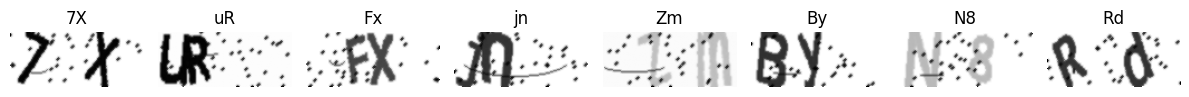

In [52]:
for images, labels in train_loader:
    batch_size = images.size(0)
    plt.figure(figsize=(12, 4))
    for i in range(min(8, batch_size)):
        img = images[i]
        label_str = decode_indices(labels[i].tolist())
        ax = plt.subplot(1, 8, i+1)
        ax.imshow(img.squeeze(0).numpy(), cmap='gray')
        ax.set_title(label_str)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    break